# Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

#Importing (Reading) Datasets

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('/content/diabets.csv', header= None, names=col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking for any null values in dataset

In [3]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

#Assigning dependent and independent variables

In [4]:
feature_cols = ['pregnant','insulin', 'bmi', 'age','glucose','bp', 'pedigree']
x=data[feature_cols]
y=data.label

# splitting the dataset into Training and Testing Dataset

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

#Fitting the Model (Logistic Regression)

In [6]:
model= LogisticRegression(solver='lbfgs', max_iter=1000)

In [7]:
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('y_pred: ', y_pred)
print(y_test)

y_pred:  [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1]
567    0
123    0
615    0
492    0
288    0
      ..
432    0
480    1
7      0
564    0
40     0
Name: label, Length: 154, dtype: int64


#Evaluation Metrics

In [8]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[88 12]
 [19 35]]
Accuracy Score :  0.7987012987012987
Accuracy in Percentage :  79 %


<Axes: xlabel='Predicted', ylabel='Actual'>

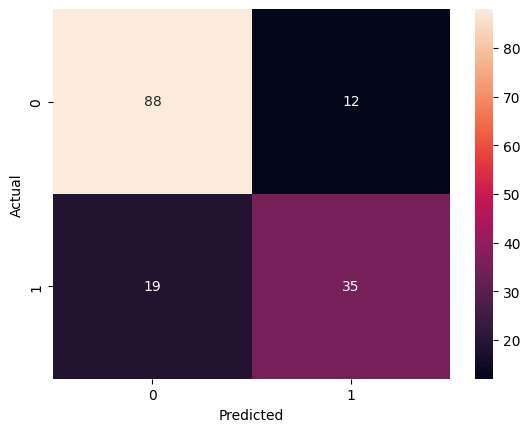

In [9]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)